# Tests for mask and berv


In [99]:
from astropy.io import fits
import matplotlib.pyplot as plt
from mingle.utilities.spectrum_utils import load_spectrum
from mingle.utilities.crires_utilities import barycorr_crires, barycorr_crires_spectrum
import TelluricSpectra.Obtain_Telluric as obt
from spectrum_overload import Spectrum
import numpy as np
from mingle.utilities.crires_utilities import barycorr_crires_spectrum

%matplotlib inline

In [100]:
def decompose_parameters(fname):
    path, name = os.path.split(fname)
    star = name.split("-")[0]
    obsnum = name.split("-")[1]
    chip = name.split(".fits")[0][-1]
    return star, obsnum, chip

decompose_parameters("HD211847-2-sum-h2otellcorr_4.fits")

('HD211847', '2', '4')

In [137]:
fname = "/home/jneal/.handy_spectra/HD30501-2a-mixavg-tellcorr_4.fits"

base_dir = os.path.join("/","home","jneal","Phd","data","Crires","BDs-DRACS","2017")


[ 0.87275887  0.88105595  0.96263707 ...,  0.96458626  0.95575362
  0.93582958]
[ 0.87275887  0.88105595  0.96263707 ...,  0.96458626  0.95575362
  0.93582958]
[ 0.98025131  0.97710389  0.97383968 ...,  0.99778231  0.99775386
  0.99770905]
[ 0.98765535  0.98199548  0.9728396  ...,  0.9971185   0.99730933
  0.99742583]
[ 0.98765535  0.98199548  0.9728396  ...,  0.9971185   0.99730933
  0.99742583]
[False False  True ..., False False False]


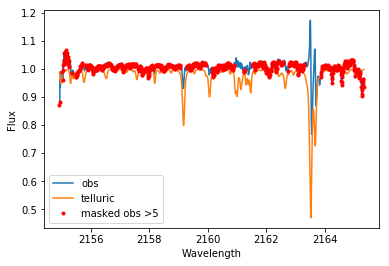

In [147]:
star, obsnum, chip = decompose_parameters(fname)
apply_berv=True
observation = load_spectrum(fname)

path = os.path.join(base_dir, "{0}-{1}".format(star, obsnum))

    # Find telluric
telluric_file = glob.glob(path + "/Telluric_files*/*_10_*.ipac")
assert len(telluric_file) == 1
teluric, tell_header = obt.load_telluric("", telluric_file[0])
tell_spec = Spectrum(xaxis=teluric[0], flux=teluric[1], header=tell_header)
    
if apply_berv:
        wlprime_obs, __ = barycorr_crires(observation.xaxis, observation.flux, observation.header)
        wlprime_tell, __ = barycorr_crires(tell_spec.xaxis, tell_spec.flux, observation.header)
        observation.xaxis = wlprime_obs
        tell_spec.xaxis = wlprime_tell

print(observation.flux)
#observation = observation.remove_nans()
print(observation.flux)
print(tell_spec.flux)
assert len(tell_spec.xaxis) != len(observation.xaxis)
tell_spec.spline_interpolate_to(observation.xaxis)
print(tell_spec.flux)
assert len(tell_spec.xaxis) == len(observation.xaxis)
assert np.allclose(tell_spec.xaxis, observation.xaxis)


tell_spec.remove_nans()
print(tell_spec.flux)
tell_mask = tell_spec.flux < (1-0.02)   #  5%

print(tell_mask)
    
masked_obs = Spectrum(xaxis=observation.xaxis[tell_mask], flux=observation.flux[tell_mask])
masked_tell = Spectrum(xaxis=tell_spec.xaxis[tell_mask], flux=tell_spec.flux[tell_mask])

maskedin_obs = Spectrum(xaxis=observation.xaxis[~tell_mask], flux=observation.flux[~tell_mask])
maskedin_tell = Spectrum(xaxis=tell_spec.xaxis[~tell_mask], flux=tell_spec.flux[~tell_mask])



observation.plot(label="obs")
tell_spec.plot(label="telluric")
maskedin_obs.plot(label="masked obs >5", color="r", linestyle="", marker=".")
plt.legend()
plt.show()

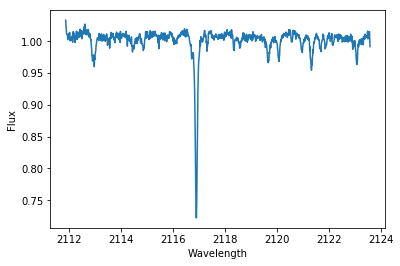

In [144]:
spec.plot()


In [49]:
star = "HD30501"
obsnum="1"
path = "/home/jneal/Phd/data/Crires/BDs-DRACS/2017/{0}-{1}".format(star, obsnum)

# Find telluric

data, header = obt.load_telluric(path, "Telluric_file/*10*")



 Could not load file Telluric_file/*10*  with extention *10*


TypeError: 'NoneType' object is not iterable

In [36]:
import glob
glob.glob?

In [50]:
print(path)

/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1


In [57]:
glob.glob(path + "/Telluric_files*/*_10_*.ipac")

['/home/jneal/Phd/data/Crires/BDs-DRACS/2017/HD30501-1/Telluric_files/tapas_2012-04-07T00-24-03_ReqId_10_R-50000_sratio-10_barydone-NO.ipac']

In [60]:
import os

('HD211847', '2', '4')

In [64]:
telluric_file = glob.glob(path + "/Telluric_files*/*_10_*.ipac")
assert len(telluric_file) == 1
data, header = obt.load_telluric("", telluric_file[0])


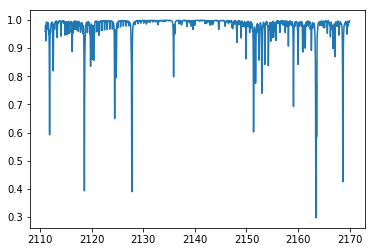

In [68]:
plt.plot(data[0],data[1])
plt.show()